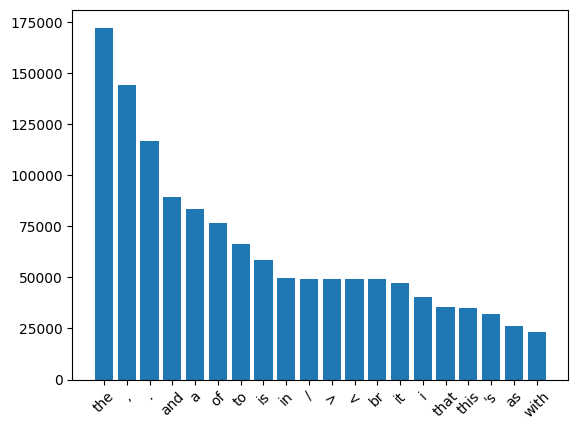

In [7]:
##### Step 1: Exploratory Data Analysis (EDA)

import os
import matplotlib.pyplot as plt
from collections import Counter

# Load example IMDB data
data_dir = os.path.join(os.getcwd(), r"aclImdb\train\pos")
texts = [open(os.path.join(data_dir, f), "r", encoding="utf-8").read() for f in os.listdir(data_dir)]

# Tokenizing
from nltk.tokenize import word_tokenize
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# Word frequency analysis
word_counts = Counter([word for sent in tokenized_texts for word in sent])
plt.bar(*zip(*word_counts.most_common(20)))  # Top 20 words
plt.xticks(rotation=45)
plt.show()


In [8]:
##### Step 2: Building Vocabulary & Data Objects

from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import dataset, dataLoader
import warnings
warnings.simplefilter("ignore", SyntaxWarning)

# Build vocabulary
def yield_tokens(tokenized_texts):
    for text in tokenized_texts:
        yield text

vocab = build_vocab_from_iterator(yield_tokens(tokenized_texts), specials=["<pad>", "<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Convert text to indices
def numericalize(text):
    return [vocab[token] for token in text]

# Dataset Definition
class IMDBDataset(Dataset):
    def __init__(self, texts):
        self.data = [numericalize(text) for text in texts]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx])

# DataLoader
dataset = IMDBDataset(tokenized_texts)
dataloader = dataLoader(dataset, batch_size=32, shuffle=True)


OSError: [WinError 127] The specified procedure could not be found

In [ ]:
##### Step 3: Defining & Training the Language Model

import torch.nn as nn

class LM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(LM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.lstm(x)
        output = self.fc(output)
        return output

# Model instance
model = LM(vocab_size=len(vocab), embed_dim=128, hidden_dim=256)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
##### Step 4: Choose LM Evaluation Metric

import math

def perplexity(loss):
    return math.exp(loss)

# Example: Suppose final loss = 1.5
print("Perplexity:", perplexity(1.5))


In [4]:
import sys
print(sys.executable)



C:\Users\GAEN0604\AppData\Local\Programs\Python\Python313\python.exe
